<a href="https://colab.research.google.com/github/smkmohsin/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

### Importing the libraries


In [118]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project/data_YesBank_StockPrices.csv')

In [121]:
dataset.head(12)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [122]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [123]:
dataset = dataset.set_index('Date')

In [124]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, Jul-05 to Nov-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2+ KB


In [126]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [127]:
df = dataset.copy()

In [128]:
test_dataset = dataset.copy()

In [129]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

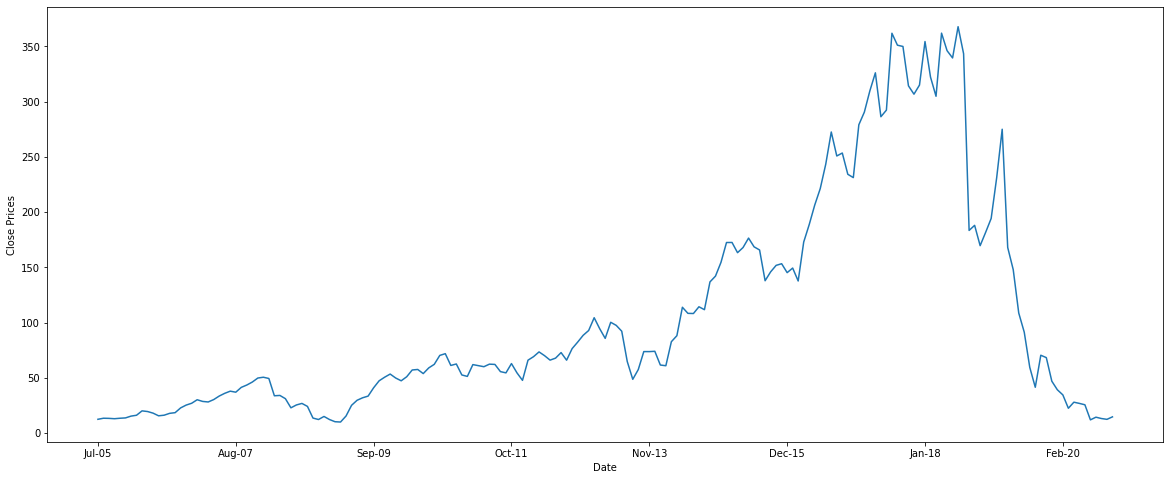

In [130]:
plt.figure(figsize=(20, 8))
df['Close'].plot()
plt.ylabel("Close Prices")
plt.show()

In [131]:
numeric_features = dataset.describe().columns
numeric_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

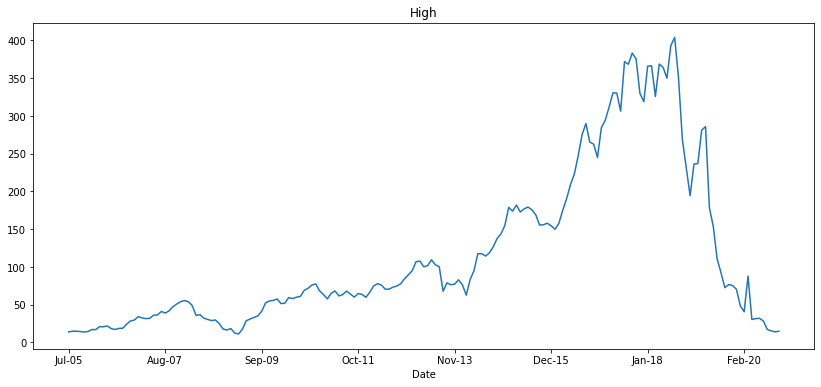

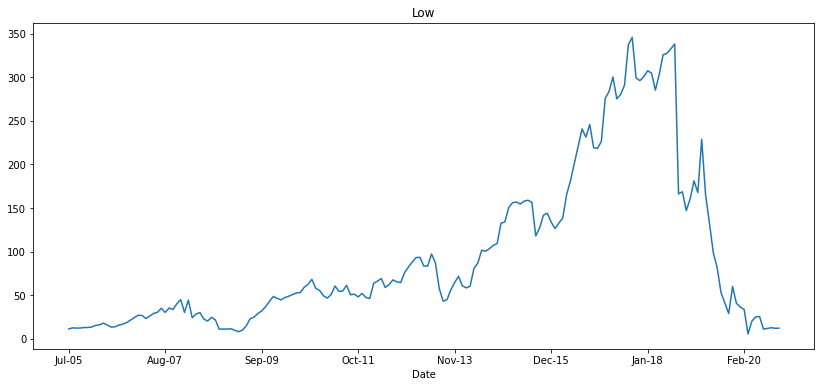

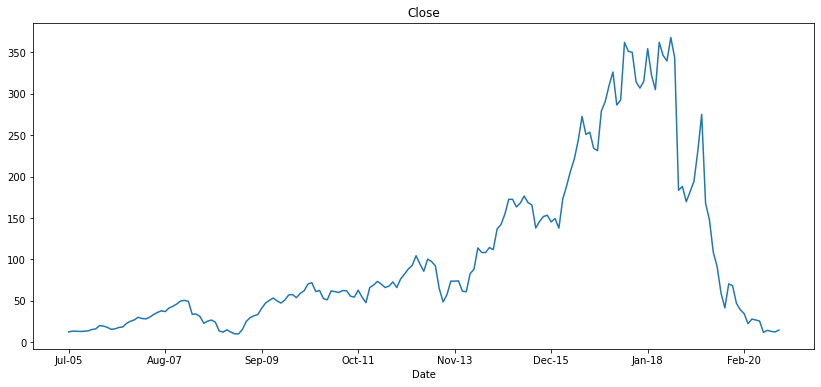

In [132]:
#@title Plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    feature = df[col]
    feature.plot()
    # feature.hist(bins=50, ax = ax)
    # ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    # ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

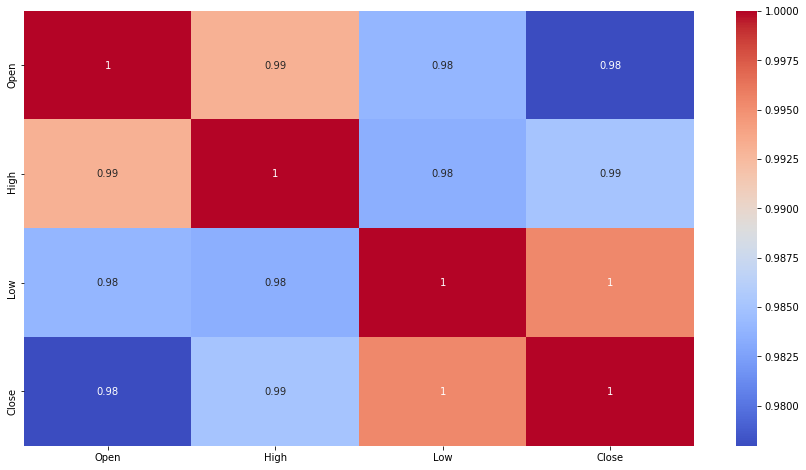

In [133]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Testing Section............

In [134]:
# Create a variable to predict 'x' days out into future
future_days = 25

In [135]:
# df['Prediction'] = df[['Close']].shift(-future_days)

In [142]:
X = df.iloc[:, :-1].values

In [143]:
X

array([[ 13.  ,  14.  ,  11.25],
       [ 12.58,  14.88,  12.55],
       [ 13.48,  14.87,  12.27],
       [ 13.2 ,  14.47,  12.4 ],
       [ 13.35,  13.88,  12.88],
       [ 13.49,  14.44,  13.  ],
       [ 13.68,  17.16,  13.58],
       [ 15.5 ,  16.97,  15.4 ],
       [ 16.2 ,  20.95,  16.02],
       [ 20.56,  20.8 ,  18.02],
       [ 19.8 ,  21.8 ,  15.8 ],
       [ 18.2 ,  18.4 ,  13.4 ],
       [ 16.  ,  17.2 ,  13.82],
       [ 15.9 ,  18.6 ,  15.7 ],
       [ 18.  ,  18.88,  16.8 ],
       [ 18.78,  24.2 ,  18.5 ],
       [ 22.8 ,  28.47,  21.4 ],
       [ 25.4 ,  29.66,  24.4 ],
       [ 27.4 ,  34.16,  27.  ],
       [ 30.2 ,  32.6 ,  26.8 ],
       [ 29.3 ,  31.58,  23.31],
       [ 27.  ,  31.99,  26.2 ],
       [ 30.66,  36.14,  29.11],
       [ 33.89,  36.38,  30.4 ],
       [ 35.98,  41.04,  35.02],
       [ 37.5 ,  39.  ,  30.2 ],
       [ 37.4 ,  41.75,  35.3 ],
       [ 41.8 ,  47.3 ,  33.6 ],
       [ 44.4 ,  50.98,  40.02],
       [ 46.4 ,  54.  ,  45.  ],
       [ 4

In [149]:
y = df['Close'].values

In [150]:
y

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [151]:
len(y)

185

In [152]:
df.shape

(185, 4)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [154]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(X_train, y_train)


from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [159]:
X_future = df.iloc[:, :-1]
X_future = X_future.tail(future_days).values
X_future

array([[192.  , 231.4 , 147.  ],
       [174.  , 194.3 , 160.2 ],
       [182.85, 236.3 , 181.15],
       [197.  , 236.9 , 167.65],
       [234.6 , 281.3 , 228.8 ],
       [277.  , 285.9 , 165.3 ],
       [163.3 , 178.05, 133.05],
       [147.95, 153.8 ,  98.75],
       [109.6 , 110.6 ,  81.75],
       [ 89.2 ,  92.4 ,  53.15],
       [ 59.5 ,  72.55,  40.95],
       [ 42.  ,  76.65,  29.05],
       [ 71.  ,  75.35,  59.95],
       [ 70.  ,  70.5 ,  40.7 ],
       [ 46.9 ,  48.5 ,  36.55],
       [ 39.1 ,  40.7 ,  33.6 ],
       [ 35.2 ,  87.95,   5.55],
       [ 22.3 ,  30.45,  20.3 ],
       [ 27.8 ,  31.6 ,  25.2 ],
       [ 27.75,  31.95,  25.55],
       [ 25.6 ,  28.3 ,  11.1 ],
       [ 12.  ,  17.16,  11.85],
       [ 14.3 ,  15.34,  12.75],
       [ 13.3 ,  14.01,  12.11],
       [ 12.41,  14.9 ,  12.21]])

In [ ]:
# X_future = df.drop(['Prediction'],1).iloc[:-future_days]
# X_future = X_future.tail(future_days).values
# X_future

In [ ]:
X_future.shape

In [ ]:
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()


lr_prediction = lr.predict(X_future)
print(lr_prediction)

In [ ]:
df[X.shape[0]:].shape

In [ ]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(40,8))
plt.title('Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])
plt.xticks(rotation=90)
plt.show

In [ ]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Valid', 'Predict'])
plt.show

# ............................................................................

In [ ]:
test_dataset

In [ ]:
test_dataset['Prediction'] = df[['Close']].shift(-future_days)